<img src="https://deepanshut041.github.io/Reinforcement-Learning/cgames/02_space_invader/images/main.gif" align="right" style="float" width="200">
<font color="#3279ca"><h1 align="left">Space Invaders-V0</h1></font>

In [ ]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False
import keras
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
print('Running! \nPlease dont interrupt this cell. It might cause serious issues..')
!pip install gym keras-rl2 pyglet==1.2.4 
!apt-get install -y cmake zlib1g-dev libjpeg-dev xvfb ffmpeg xorg-dev python-opengl libboost-all-dev libsdl2-dev swig 
!pip install 'gym[atari]' 
print('Done!')

Note: using Google CoLab
Running! 
Please dont interrupt this cell. It might cause serious issues..
     |████████████████████████████████| 52 kB 659 kB/s 
     |████████████████████████████████| 964 kB 8.5 MB/s 
     |████████████████████████████████| 1.6 MB 38.1 MB/s 
     |████████████████████████████████| 1.6 MB 21.5 MB/s 
     |████████████████████████████████| 1.6 MB 40.5 MB/s 
     |████████████████████████████████| 1.6 MB 38.8 MB/s 
     |████████████████████████████████| 1.6 MB 42.7 MB/s 
     |████████████████████████████████| 1.6 MB 42.2 MB/s 
     |████████████████████████████████| 1.6 MB 41.4 MB/s 
     |████████████████████████████████| 1.6 MB 36.8 MB/s 
     |████████████████████████████████| 1.6 MB 38.8 MB/s 
  Created wheel for gym: filename=gym-0.15.4-py3-none-any.whl size=1648485 sha256=feb43aff0ad77ee14b7e1e8c05f960ca8ca325b412677aba45f9ce475a3f67cb
  Stored in directory: /root/.cache/pip/wheels/27/97/51/3adbfe67f40bce89b8eba2d3b8f42ec1c9f9c1e6305a73510d
Successfull

In [ ]:
import random
from collections import deque
from IPython.display import clear_output
from IPython import display

from PIL import Image


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

import gym

In [ ]:
from google.colab import files
uploaded = files.upload()


!python -m atari_py.import_roms .

Saving Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.bin to Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.bin
copying space_invaders.bin from ./Space Invaders (1980) (Atari, Richard Maurer - Sears) (CX2632 - 49-75153) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/space_invaders.bin


In [ ]:
env = gym.make('SpaceInvaders-v0')
height, width, channels = env.observation_space.shape
actions = env.action_space.n

In [ ]:
def build_model(height, width, channels, actions):
    model = tf.keras.Sequential([
        layers.Conv2D(filters=32, kernel_size=8, strides=4, 
                      activation='relu', 
                      input_shape=(3,height, width, channels)),
        layers.Conv2D(filters=64, kernel_size=4, strides=2,
                      activation='relu'),
        layers.Conv2D(filters=64, kernel_size=4, strides=2,
                      activation='relu'),
        layers.Conv2D(filters=64, kernel_size=3, strides=1,
                      activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(actions, activation='linear')
    ])
    return model

model = build_model(height, width, channels, actions)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 51, 39, 32)     6176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 24, 18, 64)     32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 22, 16, 64)     36928     
_________________________________________________________________
flatten (Flatten)            (None, 67584)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34603520  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1

In [ ]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', 
                                  value_max=1., value_min=.1, 
                                  value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg',
                   nb_actions=actions, nb_steps_warmup=1000)

    return dqn

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-4))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# from tensorflow.python.client import device_lib

# device_lib.list_local_devices()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# call=EarlyStopping(patience=69,monitor='episode_reward')

history=dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


  517/10000: episode: 1, duration: 34.113s, episode steps: 517, steps per second:  15, episode reward: 50.000, mean reward:  0.097 [ 0.000, 20.000], mean action: 2.547 [0.000, 5.000],  loss: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 1515/10000: episode: 2, duration: 375.796s, episode steps: 998, steps per second:   3, episode reward: 360.000, mean reward:  0.361 [ 0.000, 30.000], mean action: 2.699 [0.000, 5.000],  loss: 3.532833, mean_q: 3.326224, mean_eps: 0.886825
 2156/10000: episode: 3, duration: 457.993s, episode steps: 641, steps per second:   1, episode reward: 235.000, mean reward:  0.367 [ 0.000, 30.000], mean action: 2.576 [0.000, 5.000],  loss: 1.048730, mean_q: 2.846639, mean_eps: 0.834850
 2555/10000: episode: 4, duration: 284.050s, episode steps: 399, steps per second:   1, episode reward: 75.000, mean reward:  0.188 [ 0.000, 25.000], mean action: 2.539 [0.000, 5.000],  loss: 0.887526, mean_q: 3.291234, mean_eps: 0.788050
 3207/10000: episode: 5, duration: 465.297s, episode steps: 652, steps per second:   1, episode reward: 185.000, mean reward:  0.284 [ 0.000, 30.000], mean action: 2.308 [0.000, 5.000],  loss: 0.653093, mean_q: 3.155643, mean_eps: 0.740755
 3793/10000: episode: 6, duration: 418.71

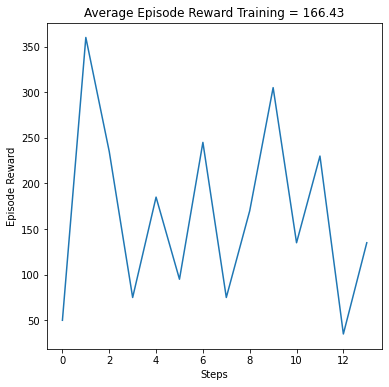

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(history.history['episode_reward'])
plt.ylabel('Episode Reward')
plt.xlabel('Steps')
plt.title('Average Episode Reward Training = %.2f'%(np.mean(history.history['episode_reward'])));

In [ ]:
dqn.save_weights(weights_filename, overwrite=True)

In [ ]:
weights_filename = 'prueba.h5'
dqn.load_weights(weights_filename)

In [ ]:
from tensorflow.keras.callbacks import Callback

class Render(Callback):
    def on_step_end(self, step, logs={}):
        plt.clf()
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)

Episode 10: reward: 185.000, steps: 779


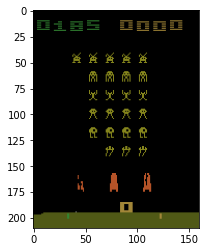

In [ ]:
history2=dqn.test(env, nb_episodes=10, visualize=False, callbacks=[Render()])

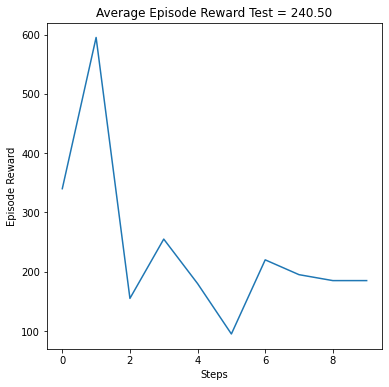

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(history2.history['episode_reward'])
plt.ylabel('Episode Reward')
plt.xlabel('Steps')
plt.title('Average Episode Reward Test = %.2f'%(np.mean(history2.history['episode_reward'])));